# Amyotrophic Lateral Sclerosis (ALS) Case-Study Cluster analysis

In [36]:
#Importing the Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [37]:
#Reading the Dataset into Pandas

In [38]:
training_df = pd.read_csv('ALS_TrainingData_2223.csv')
training_df.head(5)


,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


In [39]:
testing_df = pd.read_csv('ALS_TestingData_78.csv')
testing_df.head(5)

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,Urine.Ph_range,White.Blood.Cell..WBC._max,White.Blood.Cell..WBC._median,White.Blood.Cell..WBC._min,White.Blood.Cell..WBC._range
0,3,65.906849,46.0,44.0,43,0.024590,-1.767329,33,5.0,2,...,0,0.006440,6.5,6.00,6.0,0.004098,8.57,7.680,6.60,0.016148
1,4,54.000000,39.0,36.0,33,0.013100,-1.351852,32,23.0,14,...,0,0.013100,6.5,5.50,5.0,0.003275,8.04,6.620,4.97,0.006703
2,5,56.394521,46.0,43.0,39,0.009736,-0.412429,15,10.0,2,...,0,0.000000,7.5,6.75,6.0,0.003456,8.90,7.160,5.01,0.005410
3,6,72.619178,50.0,42.5,41,0.092784,-0.383403,34,24.0,21,...,5,0.007752,7.5,7.00,6.0,0.024194,12.38,7.905,4.96,0.076495
4,9,65.000000,45.0,42.0,36,0.021327,0.000000,37,37.0,37,...,7,0.000000,6.0,5.50,5.0,0.002370,11.53,9.290,7.94,0.008507


In [40]:
# Deleting the Unnecessary Columns 

In [41]:
del training_df['ID']
del training_df['SubjectID']

In [42]:
training_df.head()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,...,145.5,143.0,0.017422,8,7.0,7,0.002646,6.0,6.0,6.0
1,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,...,138.0,136.0,0.010453,8,7.0,5,0.005386,7.0,5.0,5.0
2,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,...,143.0,140.0,0.008929,5,0.0,0,0.008929,6.0,5.0,5.0
3,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,...,139.0,138.0,0.012469,5,5.0,3,0.004988,7.0,6.0,5.0
4,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,...,140.0,138.0,0.008292,6,4.0,1,0.008489,6.0,5.0,5.0


In [43]:
del testing_df['ID']
del testing_df['SubjectID']
testing_df.head()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,Urine.Ph_range,White.Blood.Cell..WBC._max,White.Blood.Cell..WBC._median,White.Blood.Cell..WBC._min,White.Blood.Cell..WBC._range
0,65.906849,46.0,44.0,43,0.024590,-1.767329,33,5.0,2,0.028519,...,0,0.006440,6.5,6.00,6.0,0.004098,8.57,7.680,6.60,0.016148
1,54.000000,39.0,36.0,33,0.013100,-1.351852,32,23.0,14,0.039301,...,0,0.013100,6.5,5.50,5.0,0.003275,8.04,6.620,4.97,0.006703
2,56.394521,46.0,43.0,39,0.009736,-0.412429,15,10.0,2,0.017173,...,0,0.000000,7.5,6.75,6.0,0.003456,8.90,7.160,5.01,0.005410
3,72.619178,50.0,42.5,41,0.092784,-0.383403,34,24.0,21,0.033592,...,5,0.007752,7.5,7.00,6.0,0.024194,12.38,7.905,4.96,0.076495
4,65.000000,45.0,42.0,36,0.021327,0.000000,37,37.0,37,0.000000,...,7,0.000000,6.0,5.50,5.0,0.002370,11.53,9.290,7.94,0.008507


In [ ]:
# check No of rows and columns

In [47]:
training_df.shape

(2223, 99)

In [48]:
testing_df.shape

(78, 129)

In [ ]:
#Check for null values

In [49]:
training_df.isnull().values.any()

False

In [50]:
testing_df.isnull().values.any()

False

In [51]:
# Summarized Descriptive Statistics
training_df.describe()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
count,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,...,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000
mean,54.550157,47.011134,43.952542,40.766347,0.013779,-0.728274,31.692308,27.104926,19.877193,0.026035,...,140.145254,136.755061,0.015000,6.203779,4.893387,2.955915,0.007136,6.820450,5.710639,5.183221
std,11.396546,3.233980,2.654804,3.193087,0.009567,0.622329,5.314228,6.633643,8.583509,0.016156,...,1.789886,2.715247,0.009283,1.747660,2.146076,2.358095,0.004503,0.932141,0.625039,0.437222
min,18.000000,37.000000,34.500000,24.000000,0.000000,-4.345238,11.000000,2.500000,0.000000,0.000000,...,128.000000,112.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000
25%,47.000000,45.000000,42.000000,39.000000,0.009042,-1.086310,29.000000,23.000000,14.000000,0.014035,...,139.000000,135.000000,0.010582,5.000000,3.000000,1.000000,0.003643,6.000000,5.000000,5.000000
50%,55.000000,47.000000,44.000000,41.000000,0.012111,-0.620748,33.000000,28.000000,20.000000,0.023297,...,140.000000,137.000000,0.013123,7.000000,5.000000,3.000000,0.006920,7.000000,6.000000,5.000000
75%,63.000000,49.000000,46.000000,43.000000,0.015873,-0.283832,36.000000,32.000000,27.000000,0.034799,...,141.000000,138.000000,0.017278,8.000000,6.500000,5.000000,0.009639,7.000000,6.000000,5.000000
max,81.000000,70.300000,51.100000,49.000000,0.243902,1.207011,40.000000,40.000000,40.000000,0.117647,...,146.500000,145.000000,0.142857,8.000000,8.000000,8.000000,0.042017,9.000000,9.000000,8.000000


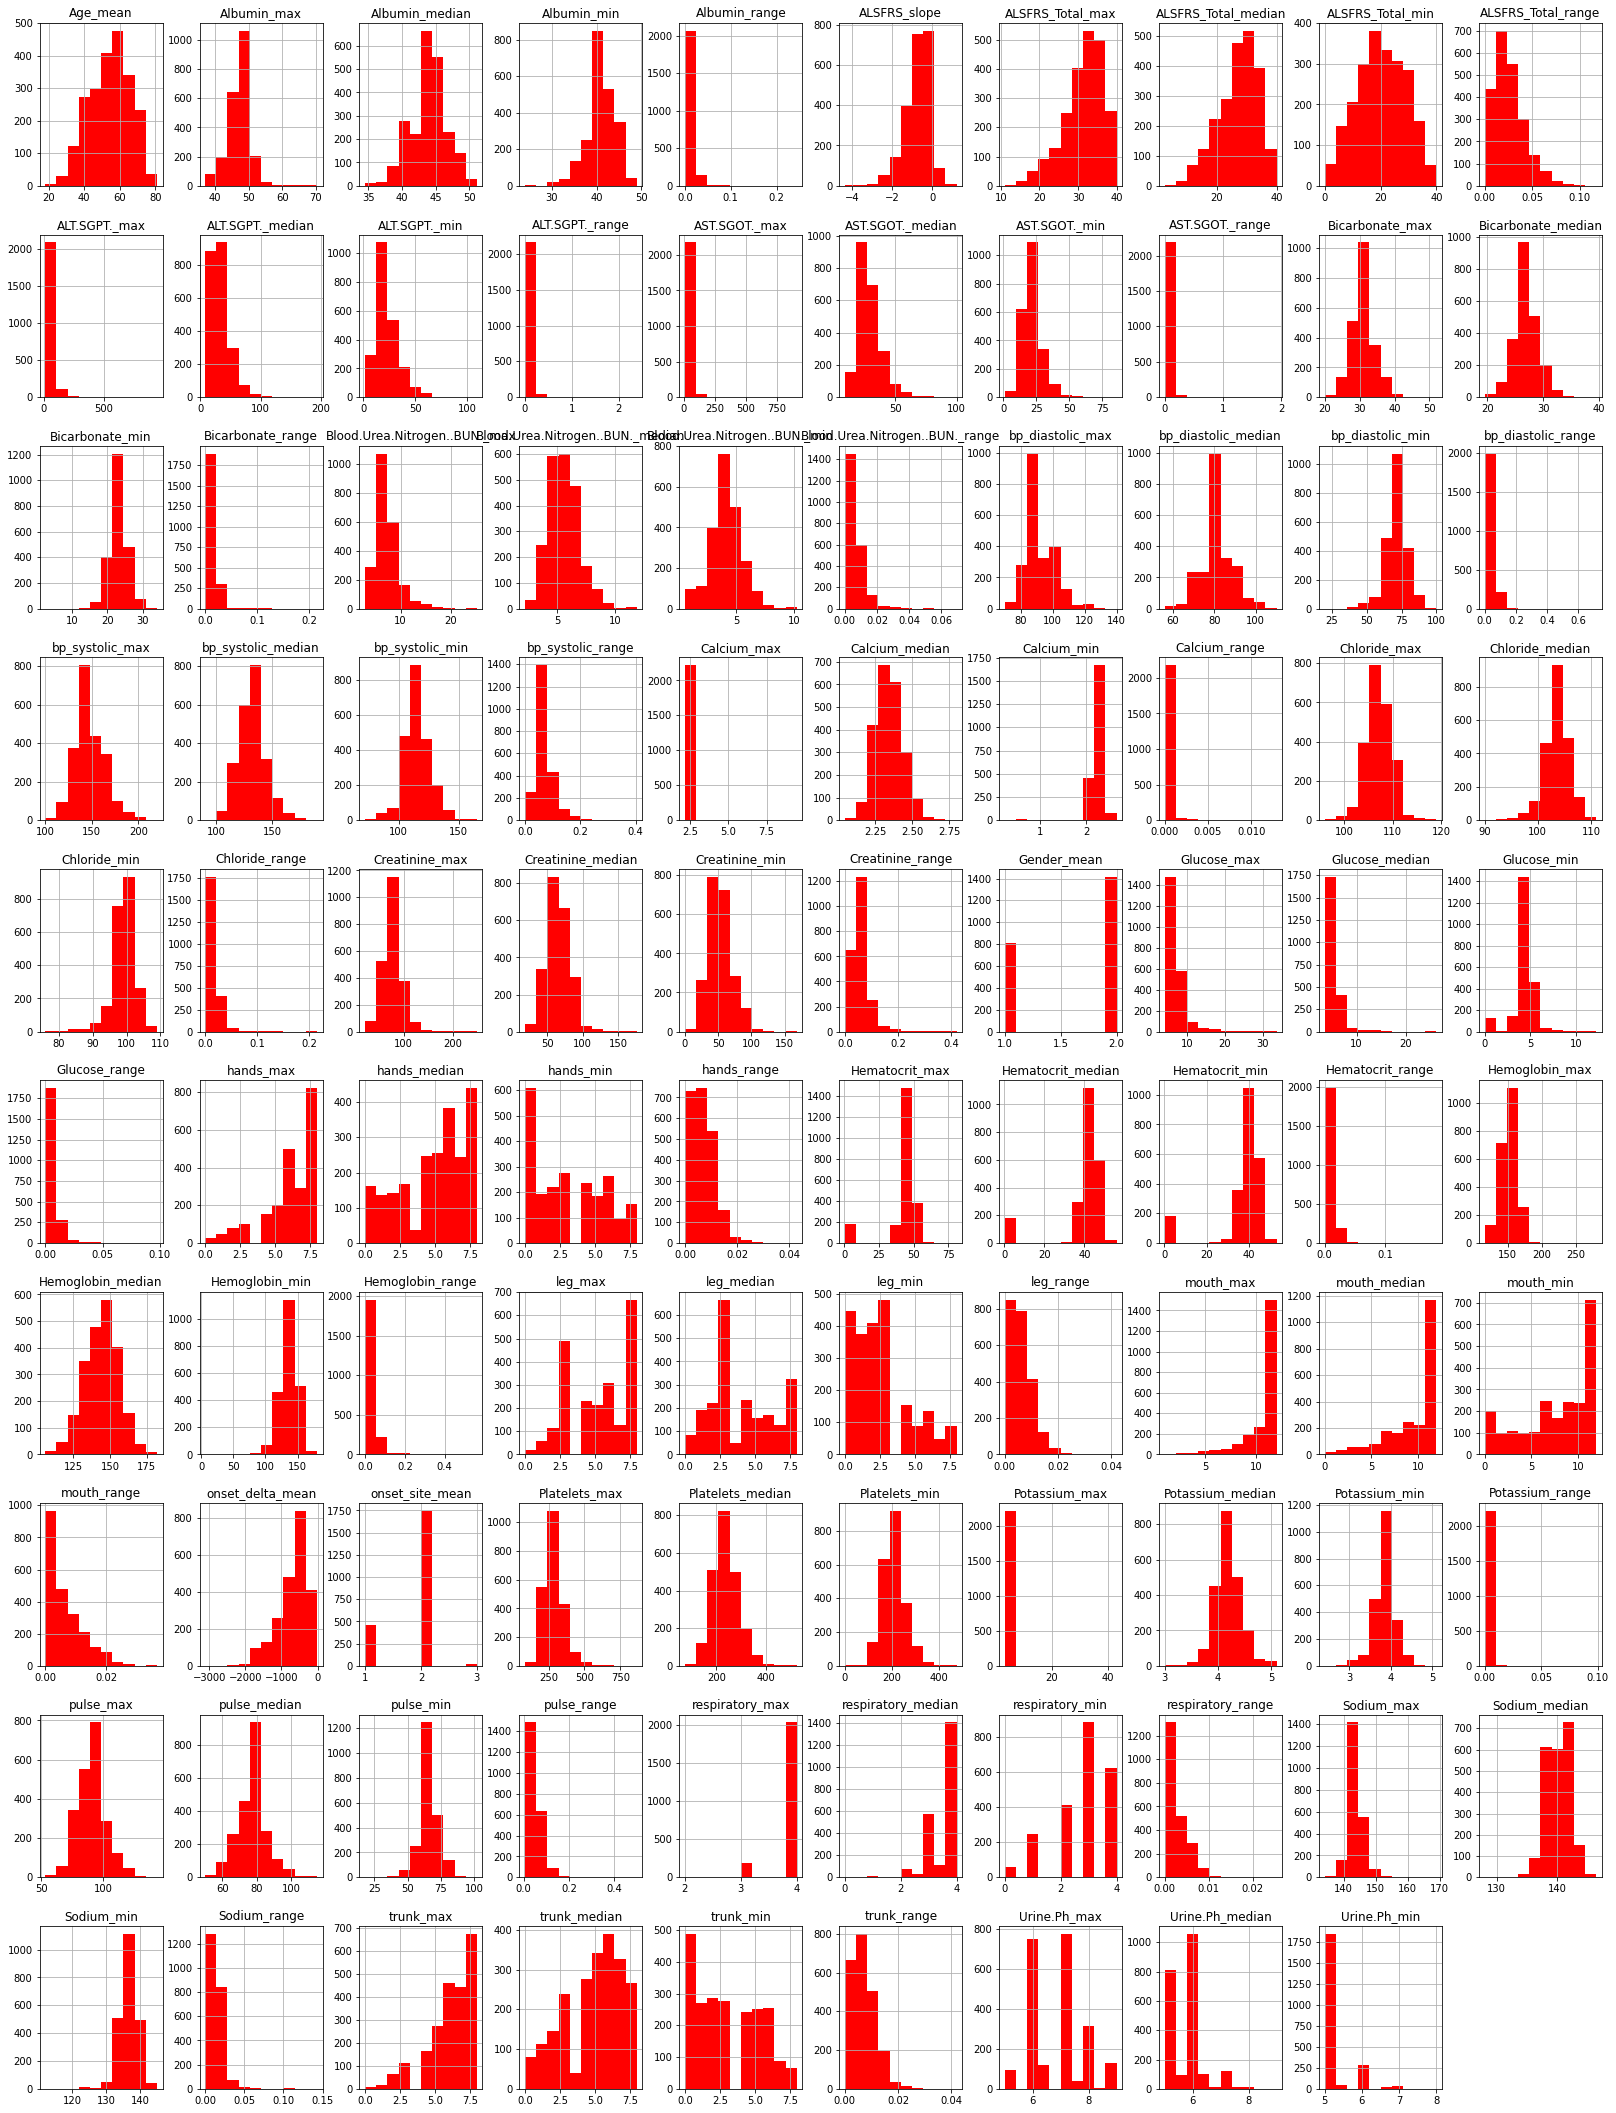

In [54]:
training_df.hist(figsize=(28,38), color='red')
plt.show()

In [62]:
#Standard Scalar

from sklearn.preprocessing import StandardScaler

scaler_N = StandardScaler()

N = training_df['ALSFRS_slope']
P = pd.DataFrame(scaler.fit_transform(training_df.drop('ALSFRS_slope', axis=1)),columns = training_df.drop('ALSFRS_slope', axis=1).columns)
P

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,...,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,0.917137,3.089417,-1.300781,-0.866550,5.480929,-0.318520,0.134960,0.247368,-0.301588,-0.679085,...,2.992342,2.300470,0.260968,1.028018,0.981832,1.715365,-0.997420,-0.880376,0.463054,1.868532
1,-0.574879,-0.622016,-1.112401,-0.553303,-0.347725,0.998995,0.888863,0.130839,0.166537,-0.656774,...,-1.198812,-0.278144,-0.489913,1.028018,0.981832,0.867032,-0.388669,0.192665,-1.137208,-0.419151
2,-1.452535,0.924415,1.148162,1.326179,-0.507103,-1.447819,-1.975969,-1.150976,-0.064100,-0.656774,...,1.595291,1.195350,-0.654169,-0.688950,-2.280669,-1.253800,0.398249,-0.880376,-1.137208,-0.419151
3,0.741606,-0.003443,0.017880,0.073191,-0.174361,-0.318520,0.285741,0.480425,-0.685524,0.168760,...,-0.639992,0.458603,-0.272701,-0.688950,0.049689,0.018699,-0.477181,0.192665,0.463054,-0.419151
4,0.741606,-0.003443,0.583021,0.386438,-0.573670,0.057913,0.059570,0.014311,-0.350529,-0.366721,...,-0.081171,0.458603,-0.722774,-0.116627,-0.416383,-0.829634,0.300598,-0.880376,-1.137208,-0.419151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,-1.891363,0.924415,1.901683,1.326179,-0.523480,0.622562,0.813473,1.179597,-1.048020,-0.188227,...,0.477650,-0.278144,-0.103934,0.455695,0.049689,0.867032,-0.775847,0.192665,0.463054,-0.419151
2219,0.566074,-0.003443,0.394641,0.386438,-0.491855,-0.130304,-0.166601,-0.335275,-0.038819,-0.701397,...,1.595291,1.563723,-0.638454,-0.688950,-0.416383,0.018699,-0.778784,0.632611,-0.337077,-0.419151
2220,-0.662644,-0.312730,0.017880,0.073191,-0.174361,-1.071386,-0.618943,0.014311,-0.934015,1.663645,...,0.477650,-0.646518,-0.202174,-0.688950,-0.416383,0.442866,-1.179720,2.338745,0.463054,-0.419151
2221,-1.540301,0.615129,0.017880,-0.553303,0.426393,0.434346,0.361131,0.130839,-0.174655,0.905047,...,-0.639992,-0.278144,-0.846582,1.028018,-0.183347,-0.405467,0.794913,-0.880376,-1.137208,-0.419151


In [ ]:
#Elbow Method for finding the Number of Clusters

In [67]:
from sklearn.cluster import KMeans
plt.style.use('ggplot')

sum_of_squared_distance = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(P)
    sum_of_squared_distance.append(kmeans.inertia_)
    

plt.figure(figsize=(10,5))
sns.lineplot(range(1,11), sum_of_squared_distance,marker='o',color='blue')

plt.title('The Elbow Method')
plt.Plabel('Number of clusters')
plt.Nlabel('sum_of_squared_distance')
plt.show()

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 720x360 with 0 Axes>